<center><h1>Last_First_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [14]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ARFF file
bin_cl = arff.loadarff('./vertebral_column_data/column_2C_weka.arff')

Get the Vertebral Column Data Set

In [15]:
# Create the DataFrame
df_bin = pd.DataFrame(bin_cl[0])
df_bin

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [16]:
# Decode byte-strings in the 'class' column to regular strings
df_bin['class'] = df_bin['class'].str.decode('utf-8')

# Create a dictionary to map the text values to the numeric values
mapping = {'Abnormal': 1, 'Normal': 0}
mapping


{'Abnormal': 1, 'Normal': 0}

In [17]:
# Add the 'class' column to the new DataFrame
df_bin['class'] = df_bin['class'].map(mapping)

# Print the resulting DataFrame
df_bin

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


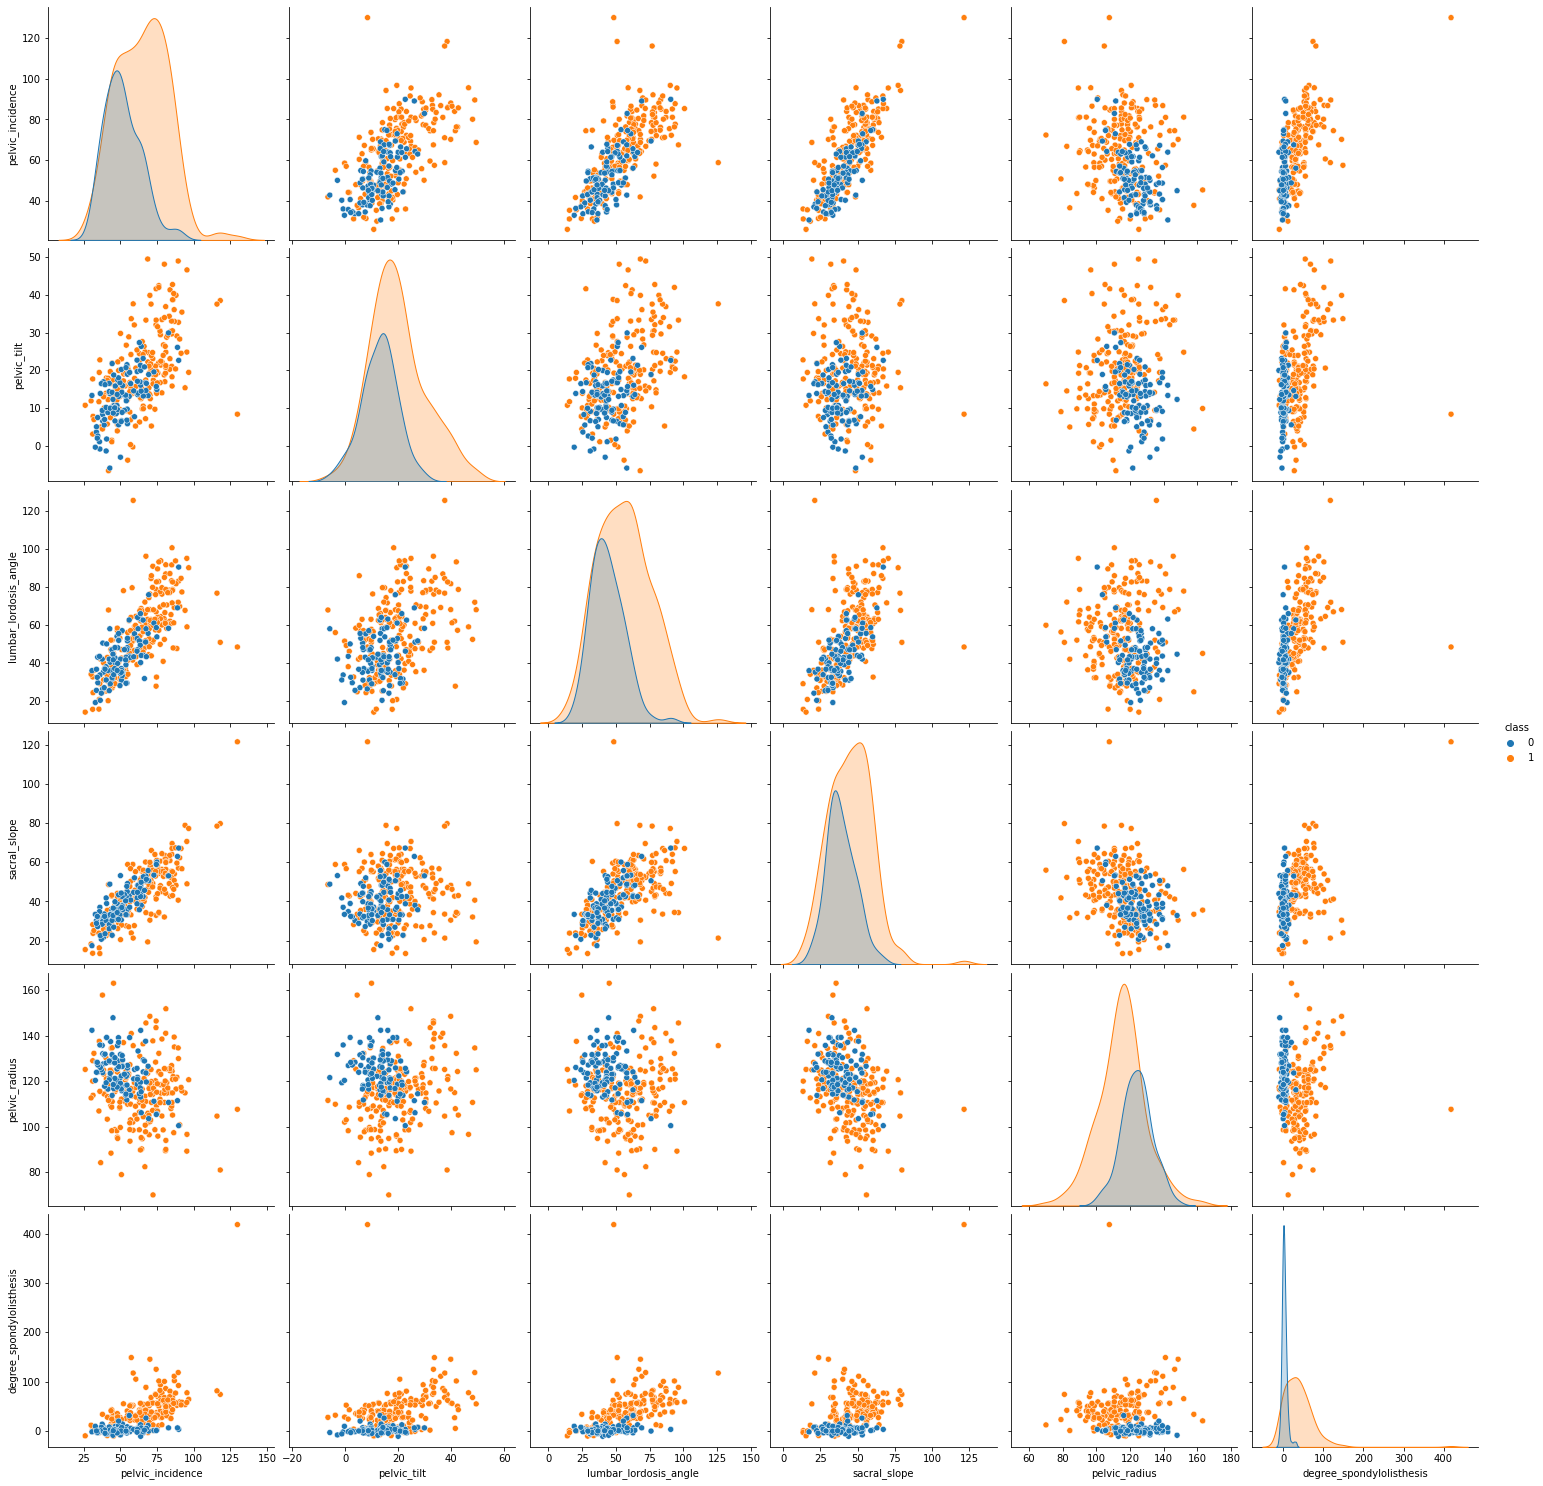

In [18]:
#I wasn't sure which scatterplot should be generated so makeing 2 different typs of plotting prompt (pairplot and scatterplot)
sns.pairplot(df_bin, hue='class', height=3.5)

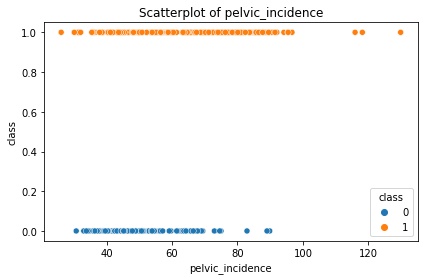

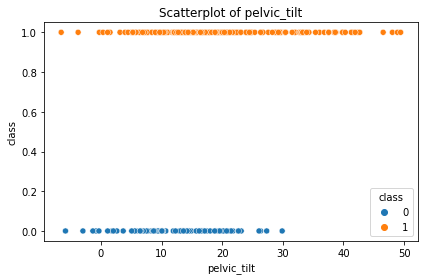

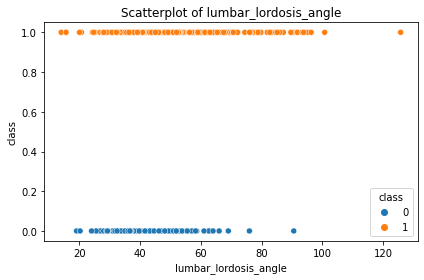

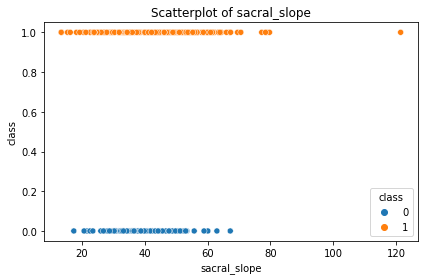

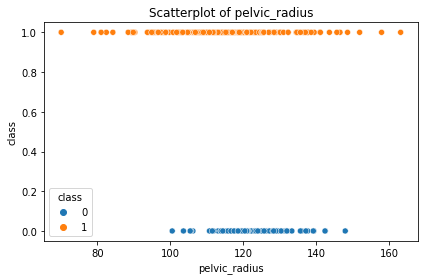

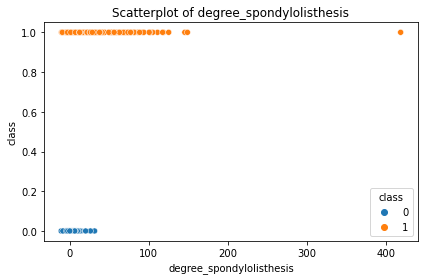

In [19]:
independent_vars = ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']

# Loop through the independent variables and create scatterplots
for var in independent_vars:
    sns.scatterplot(x=var, y='class', data=df_bin, hue='class')  # 'class' should be the dependent variable
    plt.title(f'Scatterplot of {var}')
    plt.xlabel(var)
    plt.ylabel('class')
    plt.tight_layout()
    plt.show()

#### ii. Boxplots

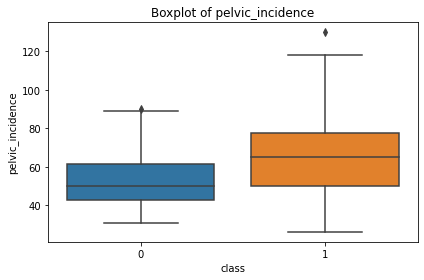

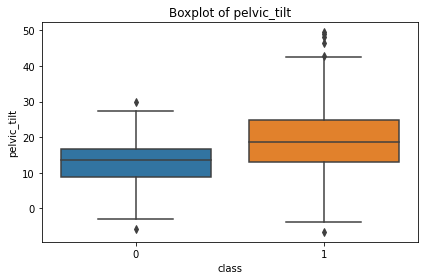

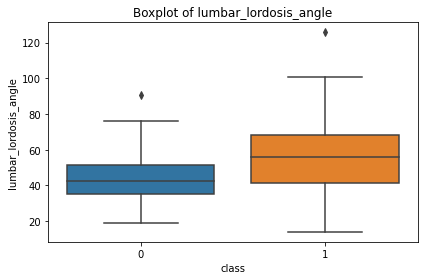

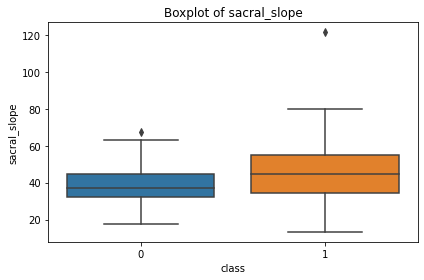

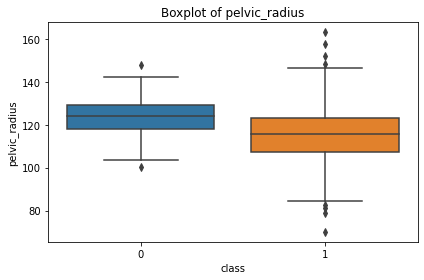

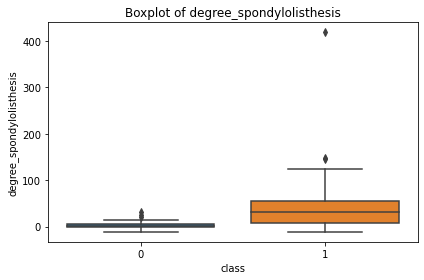

In [20]:
# Create boxplots for each independent variable
for var in independent_vars:
    sns.boxplot(x='class', y=var, data=df_bin)
    plt.title(f'Boxplot of {var}')
    plt.xlabel('class')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

#### iii. Split Data Set

In [21]:
# Select rows where 'class' is 0 (Class 0) and take the first 70 rows
cl0_tr = df_bin[df_bin['class'] == 0].iloc[:70]

# Select rows where 'class' is 1 (Class 1) and take the first 140 rows
cl1_tr = df_bin[df_bin['class'] == 1].iloc[:140]

# Concatenate the two DataFrames to create the final training set
tr_set = pd.concat([cl0_tr, cl1_tr])

# Display the training set
tr_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
210,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,0
211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,0
212,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,0
213,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,0
214,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,0
...,...,...,...,...,...,...,...
135,77.121344,30.349874,77.481083,46.771470,110.611148,82.093607,1
136,88.024499,39.844669,81.774473,48.179830,116.601538,56.766083,1
137,83.396606,34.310989,78.423293,49.085617,110.466516,49.672096,1
138,72.054034,24.700737,79.874016,47.353297,107.172358,56.426159,1


In [22]:
# Select rows where 'class' is 0 (Class 0) and skip the first 70 rows (remaining data)
cl0_te = df_bin[df_bin['class'] == 0].iloc[70:]

# Select rows where 'class' is 1 (Class 1) and skip the first 140 rows (remaining data)
cl1_te = df_bin[df_bin['class'] == 1].iloc[140:]

# Concatenate the two DataFrames to create the final test set
te_set = pd.concat([cl0_te, cl1_te])
te_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
280,50.086153,13.430044,34.457541,36.656108,119.134622,3.089484,0
281,64.261507,14.497866,43.902504,49.763642,115.388268,5.951454,0
282,53.683380,13.447022,41.584297,40.236358,113.913703,2.737035,0
283,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0
284,59.167612,14.562749,43.199158,44.604863,121.035642,2.830504,0
...,...,...,...,...,...,...,...
205,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,1
206,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,1
207,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,1
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,1


### (c) Classification

#### i. Euclidean Metric

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#### ii. Test Data

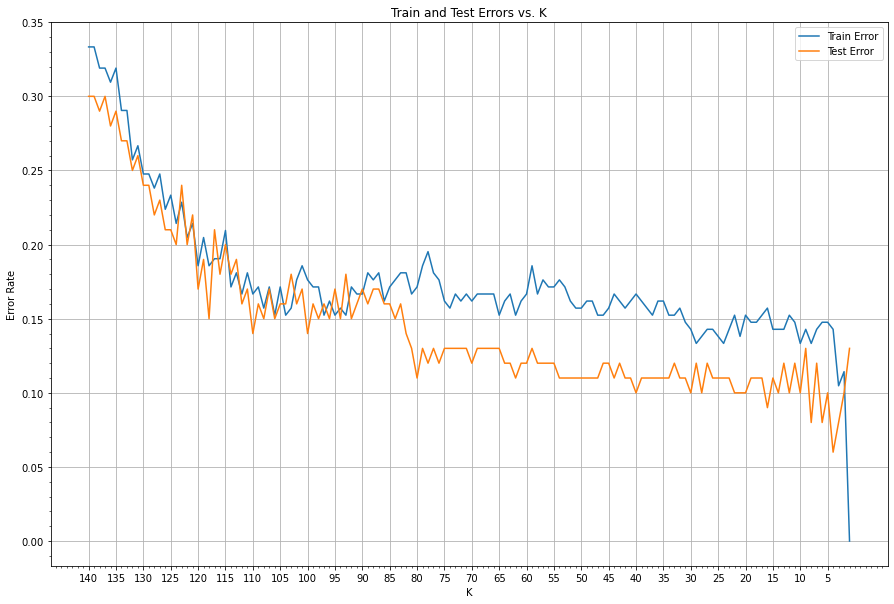

In [24]:
# Define a list of k values in reverse order
k_values = list(range(140, 0, -1))  #I used 140 max since after this point there's no meaninful plot

# Initialize lists to store train and test errors
train_errors = []
test_errors = []

# Loop through each k value
for k in k_values:
    # Initialize the KNN classifier with the current k value "n_neighbors is number of neighbors you take"
    knn = KNeighborsClassifier(n_neighbors=k)

    # Split your training data into features (X_tr) and the target variable (y_tr)
    X_tr = tr_set.drop('class', axis=1)
    y_tr = tr_set['class']

    # Split your test data into features (X_te) and the target variable (y_te)
    X_te = te_set.drop('class', axis=1)
    y_te = te_set['class']

    # Fit the classifier on the training data
    knn.fit(X_tr, y_tr)

    # Predict the class labels by majority voting
    y_tr_pred = knn.predict(X_tr)
    y_te_pred = knn.predict(X_te)
    
    # Calculate accuracy on training and test sets
    tr_accuracy = knn.score(X_tr, y_tr)
    te_accuracy = knn.score(X_te, y_te)

    # Calculate errors as 1 - accuracy
    tr_error = 1 - tr_accuracy
    te_error = 1 - te_accuracy

    # Append errors to the lists
    train_errors.append(tr_error)
    test_errors.append(te_error)

# Reverse the k-values for plotting
k_values = k_values[::-1]

# Plot train and test errors in terms of k
plt.figure(figsize=(15,10))

plt.plot(k_values, train_errors, label='Train Error')
plt.plot(k_values, test_errors, label='Test Error')

plt.grid()
plt.minorticks_on()
plt.title('Train and Test Errors vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()

# Set x-ticks manually in reverse order
step = 5
plt.xticks(k_values[::step], k_values[::-step])

plt.show()

Memo: "Your estimate in high dimensional spaces is lousy. However, the great thing with this is that estimates of probabilities may be lousy.
Estimates of class are not as lousy. So you make your probability you're calculating the probabilities bad.
You cannot rely on it much. However, the class, whether you are whether the class that you estimate is more robust, is more reliable."

It seemed k=21 is in the sweetspot

In [25]:
from sklearn.metrics import confusion_matrix

# Initialize the KNN classifier with the suitable k value "n_neighbors is number of neighbors you take"
knn2 = KNeighborsClassifier(n_neighbors=21)

# refit with new k value
knn2.fit(X_tr, y_tr)

# then predict again
y_te_pred_best = knn2.predict(X_te)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_te, y_te_pred_best)

'''[[True Negative (TN)  False Positive (FP)]
 [False Negative (FN)  True Positive (TP)]]'''

print("Confusion Matrix:")
print(conf_matrix)

# Calculate True Positive Rate (TPR)
TP = conf_matrix[1][1]
FN = conf_matrix[1][0]
TPR = TP / (TP + FN)

# Calculate True Negative Rate (TNR)
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
TNR = TN / (TN + FP)

# Calculate Precision
Precision = TP / (TP + FP)

# Calculate F1-Score
F1_Score = 2 * (Precision * TPR) / (Precision + TPR)

# Print the metrics
print(f"True Positive Rate (TPR): {TPR:.2f}")
print(f"True Negative Rate (TNR): {TNR:.2f}")
print(f"Precision: {Precision:.2f}")
print(f"F1-Score: {F1_Score:.2f}")

Confusion Matrix:
[[21  9]
 [ 1 69]]
True Positive Rate (TPR): 0.99
True Negative Rate (TNR): 0.70
Precision: 0.88
F1-Score: 0.93


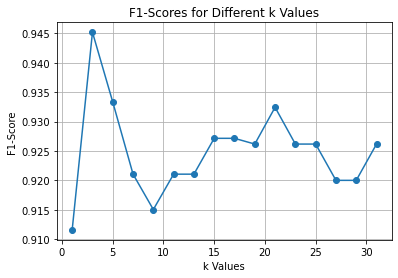

In [26]:
# to see the F1-score along the different k values I created a plot

from sklearn.metrics import f1_score

k_values = list(range(1, 33, 2))  

# Initialize an empty list to store F1-scores
f1_scores = []

# Loop through each k value
for k in k_values:
    # Initialize the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the KNN classifier on your training data
    knn.fit(X_tr, y_tr)

    # Make predictions on the test data
    y_te_pred = knn.predict(X_te)

    # Calculate the F1-score
    f1 = f1_score(y_te, y_te_pred)

    # Append the F1-score to the list
    f1_scores.append(f1)

# Print the F1-scores

plt.plot(k_values, f1_scores, marker='o')
plt.title('F1-Scores for Different k Values')
plt.xlabel('k Values')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()

#### iii. Learning Curve

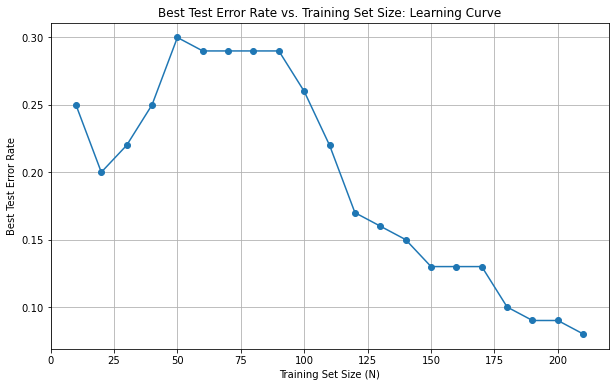

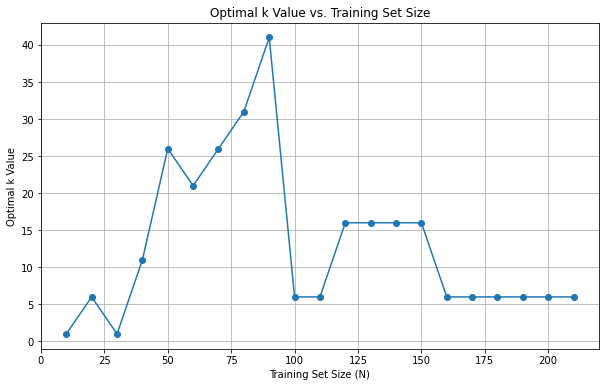

In [37]:
# Initialize an empty list to store the best test error rates
best_test_errors = []
# Initialize an empty list to store the optimal k values
optimal_k_values = []

def find_optimal_k(X_tr, y_tr, X_te, k_values):
    best_error_rate = 1.0  # Initialize with a high value
    best_k = None

    for k in k_values:
        if k <= len(X_tr):  # Check if k is valid for the training set size
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_tr, y_tr)
            te_error = 1 - knn.score(X_te, y_te)

            if te_error < best_error_rate:
                best_error_rate = te_error
                best_k = k

    return best_error_rate, best_k

# Define a range of training set sizes from 10 to 210 with a step of 10
training_set_sizes = list(range(10, 211, 10))

# Loop through each training set size
for N in training_set_sizes:
    n_samples_class_0 = N // 3
    n_samples_class_1 = N - n_samples_class_0

    class_0_subset = df_bin[df_bin['class'] == 0].iloc[:n_samples_class_0]
    class_1_subset = df_bin[df_bin['class'] == 1].iloc[:n_samples_class_1]

    selected_training_set = pd.concat([class_0_subset, class_1_subset])

    X_tr = selected_training_set.drop('class', axis=1)
    y_tr = selected_training_set['class']

    best_error, best_k = find_optimal_k(X_tr, y_tr, X_te, k_values)

    best_test_errors.append(best_error)
    optimal_k_values.append(best_k)

# Plot the best test error rates against the training set sizes
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, best_test_errors, marker='o')
plt.title('Best Test Error Rate vs. Training Set Size: Learning Curve')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Best Test Error Rate')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, optimal_k_values, marker='o')
plt.title('Optimal k Value vs. Training Set Size')
plt.xlabel('Training Set Size (N)')
plt.ylabel('Optimal k Value')
plt.grid(True)
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

##### C. Chebyshev Distance With p -> infinity.

#### ii. Mahalanobis Distance.

### (e) Weighted Decision

### (f) Training Error Rate